# Tune_lgb
* 제출결과 : 0.3913216698

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# #colab용
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/')

In [4]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

## DATA Setting

In [5]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [7]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42,stratify = train_y)

## Modeling

In [13]:
lgbm_c = lgb.LGBMClassifier(learning_rate=0.01,max_depth=12,num_leaves=25, n_estimators=2000, random_state = 42)
lgbm_c.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=25, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
train_y_pred = lgbm_c.predict_proba(X_test)

from sklearn.metrics import log_loss
#log_loss
log_loss(y_test,train_y_pred,labels= list(set(y_test)))

0.38397731947273483

In [15]:
lgbm_c.score(X_test, y_test)

0.8697456581886063

## Gridsearch_cv

In [11]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()
from sklearn.pipeline import Pipeline

In [12]:
#최적의 변수를 찾기 위한 KBest 함수 불러오기
#파이프라인 구축
pipe_lgbm = Pipeline([("kbest", model_kbest),('lgbm',lgbm_c)])
#파라미터 생성
params_lgbm = {"kbest__k":[13],
          "lgbm__max_depth": [15,20,25],
         "lgbm__learning_rate": [0.001,0.05,0.004],
         "lgbm__num_leaves": [15,20,25],
         "lgbm__n_estimators": [200,300,400,500],
         "lgbm__random_state": [42]}

NameError: name 'lgbm' is not defined

In [ ]:
#최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe_lgbm, param_grid = params_lgbm,
                          cv=3, n_jobs=-1, verbose=10)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
lgbm_grid = grid_search.best_estimator_
lgbm_grid

### feature_importance

In [11]:
pi_df = pd.DataFrame(lgbm_c.feature_importances_, index= train_X.columns,columns= ['importance']).sort_values('importance',ascending = False)
pi_df.head()

,importance
fiberID,65731
petroMag_u,50242
modelMag_u,50164
psfMag_z,48223
fiberMag_u,47825


### 예측결과에 대해
잘된예측 : 1,3,4,5,6,8,9,10,14,15,16,18  
중간예측 : 0,2,7,13  
망한예측 : 11,12,17

In [15]:
train_y_pred = lgbm_c.predict(X_test)

C:\Users\starl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
cm_result = pd.DataFrame(confusion_matrix(y_test,train_y_pred))

In [17]:
cm_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,266,0,0,0,21,37,1,173,60,0,0,17,0,0,21,10,0,0,42
1,2,1879,0,1,0,1,2,3,16,0,0,4,0,0,0,2,2,0,40
2,0,1,68,73,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0
3,0,0,25,653,0,0,0,0,0,2,89,0,0,0,0,0,0,0,0
4,1,0,0,0,4265,24,0,0,9,0,1,1,0,0,0,85,0,0,0
5,17,0,0,0,234,3510,2,80,26,0,0,1,0,0,0,165,0,0,15
6,3,15,0,1,8,3,10966,2,62,1,0,52,0,70,13,8,0,0,0
7,157,0,0,0,0,198,0,673,34,0,0,0,0,0,0,1,1,0,332
8,11,15,3,4,42,252,125,17,13060,0,13,198,0,51,112,19,18,0,964
9,0,0,0,0,0,0,2,0,4,32,0,0,0,0,0,0,0,0,0


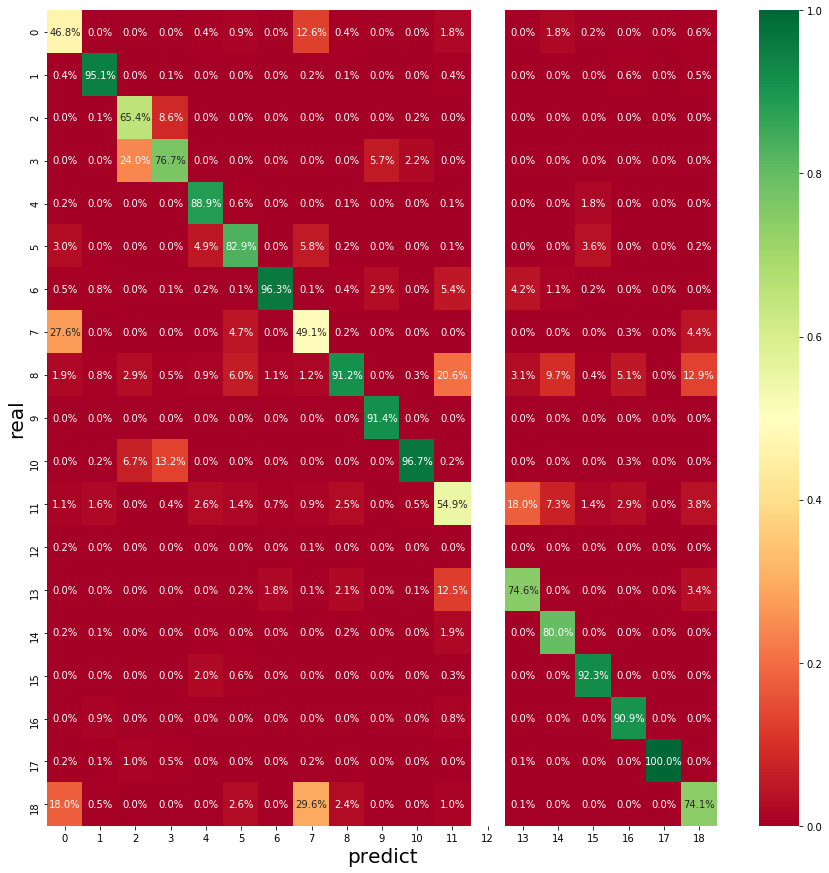

In [18]:
plt.figure(figsize =(15,15))
sns.heatmap(cm_result/np.sum(cm_result),annot = True, cmap ='RdYlGn',fmt='.1%')
plt.ylabel("real",fontsize=20)
plt.xlabel("predict",fontsize=20)
plt.show()

# REAL

In [19]:
lgbm_c.fit(train_X, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=12,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=2000, n_jobs=-1, num_leaves=25, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
y_pred = lgbm_c.predict_proba(test_X)

In [21]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('./submisson/submission.csv', index=True)